# Exploratory questions:::

1) Loading and cleaning of data (handling missing values)                      
2) Summary statistics              

Univariate analysis:

3) PDF of price                               
4) Histogram for price                    
5) Risk rating distribution                 
6) Pie chart for fuel type                  

Bivariate analysis:  

7) city mpg vs highway mpg                                              
8) Body style vs price                                                                                                                        
9) Body style vs wheel base                                              
10) Make vs Risk Rating                    

Multivariate analysis: 

11) Fuel type vs price vs city mpg                                         
12) Make vs Curb-weight vs Drive wheel analysis                                                                                                              
13) Variable analysis to see impact on automobile pricing                                         
14) Variable analysis to see impact on mileage   

Conclusion:    

15) CHoosing the best car in terms of price and mileage

In [430]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [431]:
#missing value ? is replaced with NaN
auto = pd.read_table('Automobile_data.txt',delimiter=',',na_values='?')

In [432]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [433]:
auto.describe()
#The below stats indicates there are missing values..as count for few columns is not 205

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [434]:
#Function to give stats regrading missing values

def miss():
    miss_cnt = auto.isnull().any(axis=1).sum()
    print('The number of rows having missing values are: '+str(miss_cnt))
    print('\nThe percentage of missing values is: '+str(float(miss_cnt)/auto.shape[0]*100))
    a1=auto.isnull().sum()
    print('\nThe columns having missing values are:\n')
    print a1[a1>0]
    

In [435]:
miss()

The number of rows having missing values are: 46

The percentage of missing values is: 22.4390243902

The columns having missing values are:

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [436]:
#normalized losses is having majority of missing values 
#This is not active part of our analysis hence removing the column

In [437]:
del auto['normalized-losses']

In [438]:
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [439]:
miss()

The number of rows having missing values are: 12

The percentage of missing values is: 5.85365853659

The columns having missing values are:

num-of-doors    2
bore            4
stroke          4
horsepower      2
peak-rpm        2
price           4
dtype: int64


In [440]:
auto

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [441]:
#function to convert non-numerical data to numerical data
def replace(x):
    if x == 'two':
        return int(2)
    elif x == 'four':
        return int(4)
    
auto['num-of-doors'] = auto['num-of-doors'].apply(replace)

In [442]:
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [443]:
auto['num-of-doors'].dtype

dtype('float64')

In [444]:
auto[auto['make']=='dodge'][['body-style','num-of-doors']]

,body-style,num-of-doors
21,hatchback,2.0
22,hatchback,2.0
23,hatchback,2.0
24,hatchback,4.0
25,sedan,4.0
26,sedan,4.0
27,sedan,NaN
28,wagon,4.0
29,hatchback,2.0


In [445]:
#num-of-doors is Categorical data
#replace missing values with mode corresponding to make and body-style
g=lambda x:x.mode()
mod = auto.groupby(['make','body-style'])['num-of-doors'].transform(g)
auto['num-of-doors'].fillna(mod,inplace=True)


In [446]:
#changing data type from flat to int
auto['num-of-doors'] = auto['num-of-doors'].astype('int64')
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [447]:
miss()

The number of rows having missing values are: 10

The percentage of missing values is: 4.87804878049

The columns having missing values are:

bore          4
stroke        4
horsepower    2
peak-rpm      2
price         4
dtype: int64


In [448]:
#displaying make, bore, stroke
auto.iloc[:,[1,17,18]].head(25)

,make,bore,stroke
0,alfa-romero,3.47,2.68
1,alfa-romero,3.47,2.68
2,alfa-romero,2.68,3.47
3,audi,3.19,3.40
4,audi,3.19,3.40
5,audi,3.19,3.40
6,audi,3.19,3.40
7,audi,3.19,3.40
8,audi,3.13,3.40
9,audi,3.13,3.40


In [449]:
#displaying rows containing missing values
auto[auto.isnull().any(axis=1)]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,isuzu,gas,std,2,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,isuzu,gas,std,4,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
55,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
129,1,porsche,gas,std,2,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN
130,0,renault,gas,std,4,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0


In [450]:
#The values are bore and stroke are very closeby based on make
#replace missing values in bore ans stroke with mean (groupby make)
h = lambda x: round(x.mean(),2)
mean1 = auto.groupby('make')[['bore','stroke']].transform(h)
auto.fillna({'bore':mean1['bore'],'stroke':mean1['stroke']},inplace = True)


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,audi,gas,std,2,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,audi,gas,std,4,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,audi,gas,std,4,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [451]:
miss()

The number of rows having missing values are: 6

The percentage of missing values is: 2.92682926829

The columns having missing values are:

horsepower    2
peak-rpm      2
price         4
dtype: int64


In [452]:
auto[auto.isnull().any(axis=1)]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,isuzu,gas,std,2,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,isuzu,gas,std,4,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,porsche,gas,std,2,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN
130,0,renault,gas,std,4,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0


In [453]:
auto[auto.make=='renault']

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,renault,gas,std,4,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [454]:
#horsepower peak-rpm both are having missing values for 'renault' car
#hence dropping it
auto.drop(auto[auto.make=='renault'].index,inplace=True)

In [455]:
auto.shape

(203, 25)

In [456]:
miss()

The number of rows having missing values are: 4

The percentage of missing values is: 1.97044334975

The columns having missing values are:

price    4
dtype: int64


In [457]:
auto[auto.isnull().any(axis=1)]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,isuzu,gas,std,2,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,isuzu,gas,std,4,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,porsche,gas,std,2,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [458]:
auto.iloc[:,[1,2,16,12,20,24]].sort_values(['make','horsepower'])

,make,fuel-type,fuel-system,curb-weight,horsepower,price
0,alfa-romero,gas,mpfi,2548,111.0,13495.0
1,alfa-romero,gas,mpfi,2548,111.0,16500.0
2,alfa-romero,gas,mpfi,2823,154.0,16500.0
3,audi,gas,mpfi,2337,102.0,13950.0
5,audi,gas,mpfi,2507,110.0,15250.0
6,audi,gas,mpfi,2844,110.0,17710.0
7,audi,gas,mpfi,2954,110.0,18920.0
4,audi,gas,mpfi,2824,115.0,17450.0
8,audi,gas,mpfi,3086,140.0,23875.0
9,audi,gas,mpfi,3053,160.0,NaN


In [459]:
#there is lot of variation in prices for similar types of vehicles
#so dopping those ones
auto.drop(auto[auto.isnull().any(axis=1)].index,inplace=True)

In [460]:
auto.shape

(199, 25)

In [461]:
miss()

The number of rows having missing values are: 0

The percentage of missing values is: 0.0

The columns having missing values are:

Series([], dtype: int64)


In [462]:
#Now the data is clean and we can proceed with next steps

In [463]:
#first step in EDA 
#summary statistics of different variables

In [464]:
auto.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.839196,3.145729,98.824121,174.151256,65.882412,53.775879,2556.030151,126.824121,3.328593,3.251307,10.178995,103.396985,5117.587940,25.201005,30.683417,13243.432161
std,1.257009,0.991820,6.090838,12.371905,2.110996,2.447039,519.855544,41.752932,0.269163,0.311004,4.022424,37.553843,480.521824,6.451826,6.849410,7978.707609
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.550000,64.100000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,2.000000,4.000000,102.400000,183.500000,66.700000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


for most of the fields the mean is almost closer to median(Q2), can guess it looks like normal dictribution expect for price where there seems median is lot more to the left of mean (that is long right tail)

# univariate analysis:                                      
1) PDF of price                                  
2) Histogram for price                                                                                                  
3) Risk rating distribution                                   
4) Pie chart for fuel type                    


In [465]:
import scipy.stats as stats

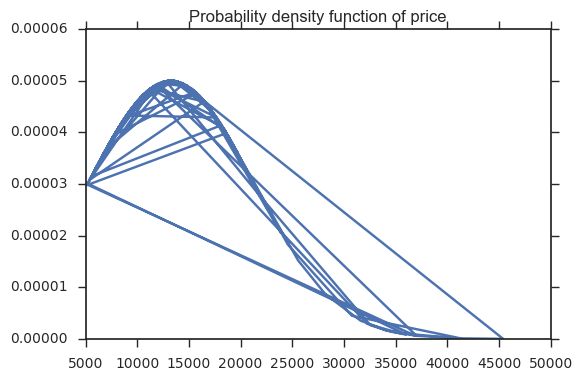

In [466]:
plt.plot(auto['price'], stats.norm.pdf(auto['price'], loc=auto['price'].mean(), scale=auto['price'].std()))
plt.title('Probability density function of price')

Can infer a longer right tail (right skewed)

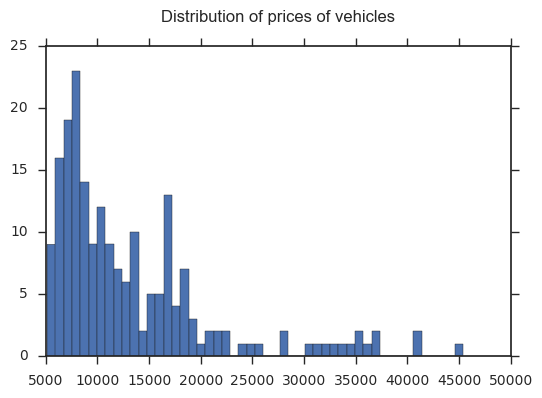

In [467]:
plt.hist(auto.price,histtype='bar',bins=50)
plt.title('Distribution of prices of vehicles\n')

There seems two prominent peaks in the distribution. Can be called as 'Bimodal'

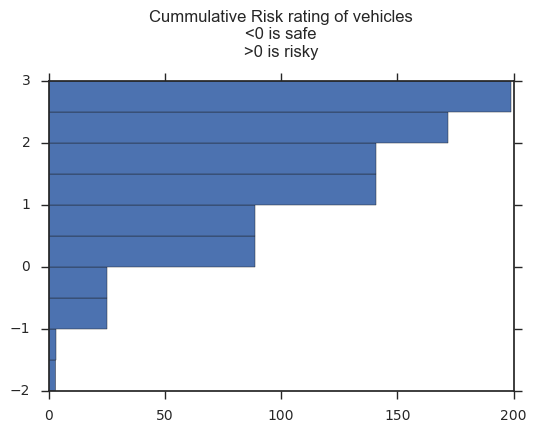

In [468]:
plt.hist(auto.symboling,orientation='horizontal',cumulative=True)
plt.title('Cummulative Risk rating of vehicles\n<0 is safe\n>0 is risky\n')

There are many vehicles that are risky

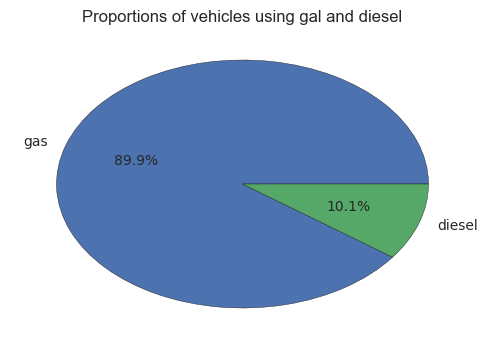

In [469]:
plt.pie(auto['fuel-type'].value_counts(),labels=['gas','diesel'],autopct='%1.1f%%')
plt.title('Proportions of vehicles using gal and diesel')

Gas is preferred fuel type compared to diesel

# Bivariate analysis:                                      
1) city mpg vs highway mpg                                  
2) Body style vs price                                                                                                  
3) Body style vs wheel base                                 
4) Make vs Risk Rating                 


C:\Users\Srimala Bharadwaj\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x262d37b8>,
 'caps': [<matplotlib.lines.Line2D at 0x263e3898>,
 'fliers': [<matplotlib.lines.Line2D at 0x2659df28>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2637aa58>,
 'whiskers': [<matplotlib.lines.Line2D at 0x262d32e8>,
  <matplotlib.lines.Line2D at 0x263cf128>]}

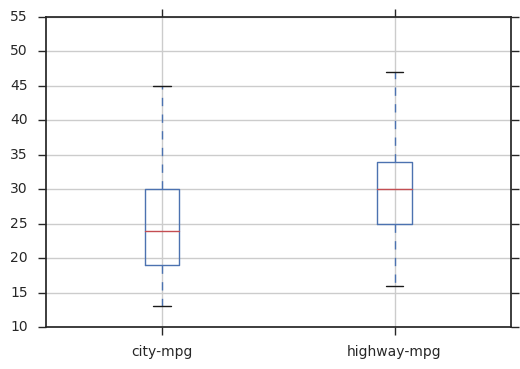

In [470]:
auto.boxplot(column=['city-mpg','highway-mpg'])

 
- Can infer that highway mpg is more than city mpg
- There are no outliers
- Data is well spread out in city mpg compared to highway mpg
- City mpg seems to be more normally distributed than highway mpg


In [471]:
import seaborn as sns

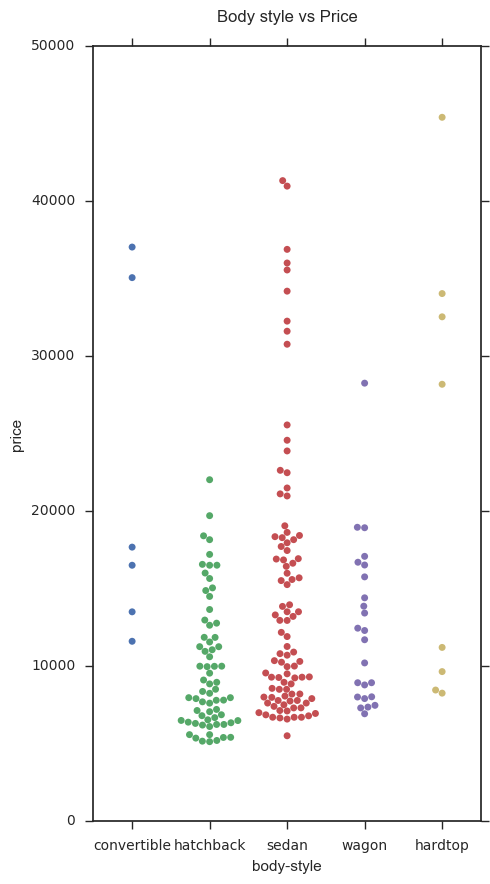

In [472]:
#using swarmplot as it enables to plot non-numerical variables
plt.figure(figsize=(5,10))
sns.swarmplot(x="body-style", y="price", data=auto)
plt.title('Body style vs Price\n')

- Sedan seems to be more popular choice with a wide range of price
- Hatchback and wagon price range is similar. Hatchback seems popular among these 2. You can fold down the rear seats in nearly all hatchbacks, allowing for significantly more cargo space
- Not many people are prefering convertible and hardtop. These seem to be sports variety with limited customers

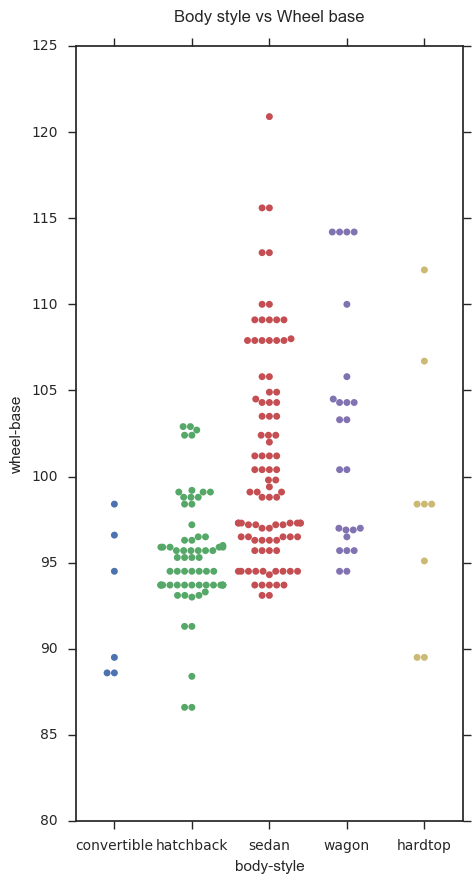

In [473]:
plt.figure(figsize=(5,10))
sns.swarmplot(x="body-style", y="wheel-base", data=auto)
plt.title('Body style vs Wheel base\n')

- Can confirm above understanding that even though hatchback and wagon have similar wheel base, the design of hatchbacks allow for flexibilty in space and hence is more preffered

In [474]:
auto.groupby('make')['symboling'].value_counts().to_frame()

symboling
make          symboling           
alfa-romero    3                 2
               1                 1
audi           1                 3
               2                 3
bmw            0                 6
               1                 1
               2                 1
chevrolet      0                 1
               1                 1
               2                 1
dodge          1                 7
              -1                 1
               3                 1
honda          0                 7
               1                 4
               2                 2
isuzu          0                 1
               2                 1
jaguar         0                 3
mazda          1                 7
               0                 6
               3                 4
mercedes-benz -1                 4
               0                 2
               1                 1
               3                 1
mercury        1                 1
mitsubishi     3                 5
               1                 4
               2                 3
              -1                 1
nissan         1                10
               0                 5
               3                 2
               2                 1
peugot         0                11
plymouth       1                 5
              -1                 1
               3                 1
porsche        3                 4
saab           2                 3
               3                 3
subaru         0                 9
               2                 3
toyota         0                10
              -1                 7
               1                 7
               2                 6
               3                 2
volkswagen     2                 7
               0                 3
               3                 2
volvo         -1                 8
              -2                 3

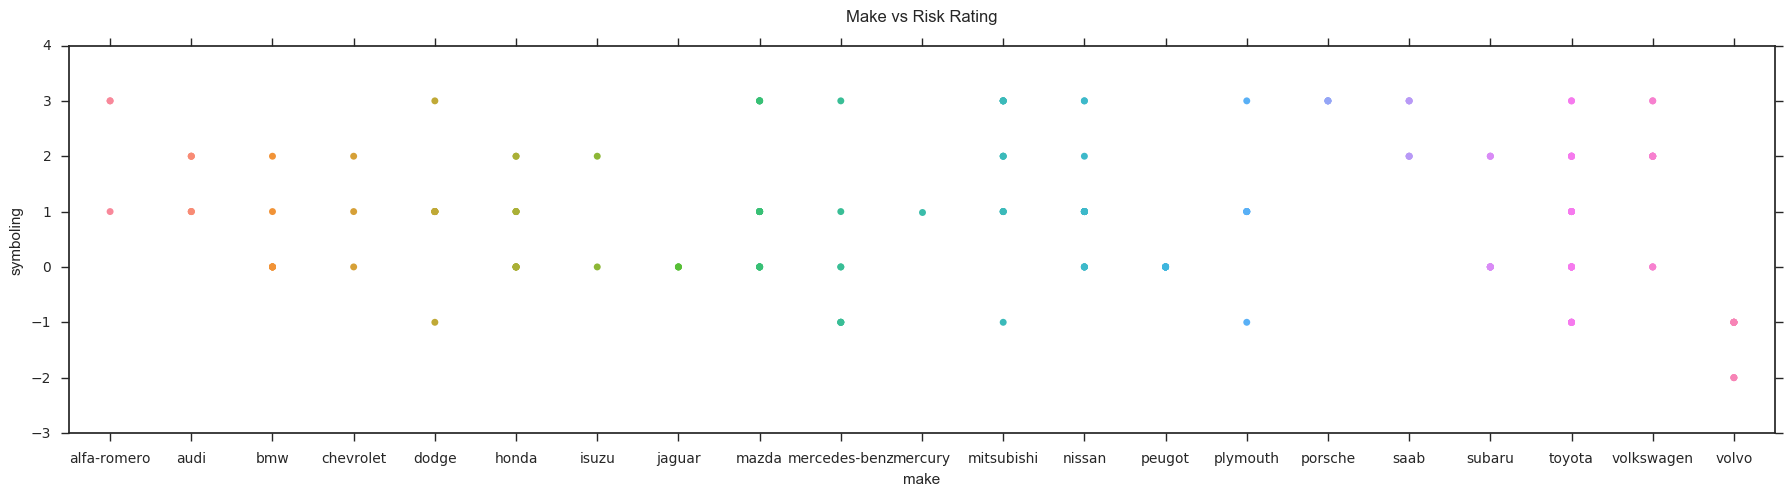

In [475]:
plt.figure(figsize=(22,5))
sns.stripplot(y="symboling", x="make", data=auto)
plt.title('Make vs Risk Rating\n')

- Safe cars are volvo (safest),followed by peugot,jaguar
- Risky car are porsche, saab

# Multivariate analysis:                                      
1) Fuel type vs price vs city mpg                                 
2) Make vs Curb-weight vs Drive wheel analysis                                                                                                
3) Variable analysis to see impact on automobile pricing                                
4) Variable analysis to see impact on mileage                                                 


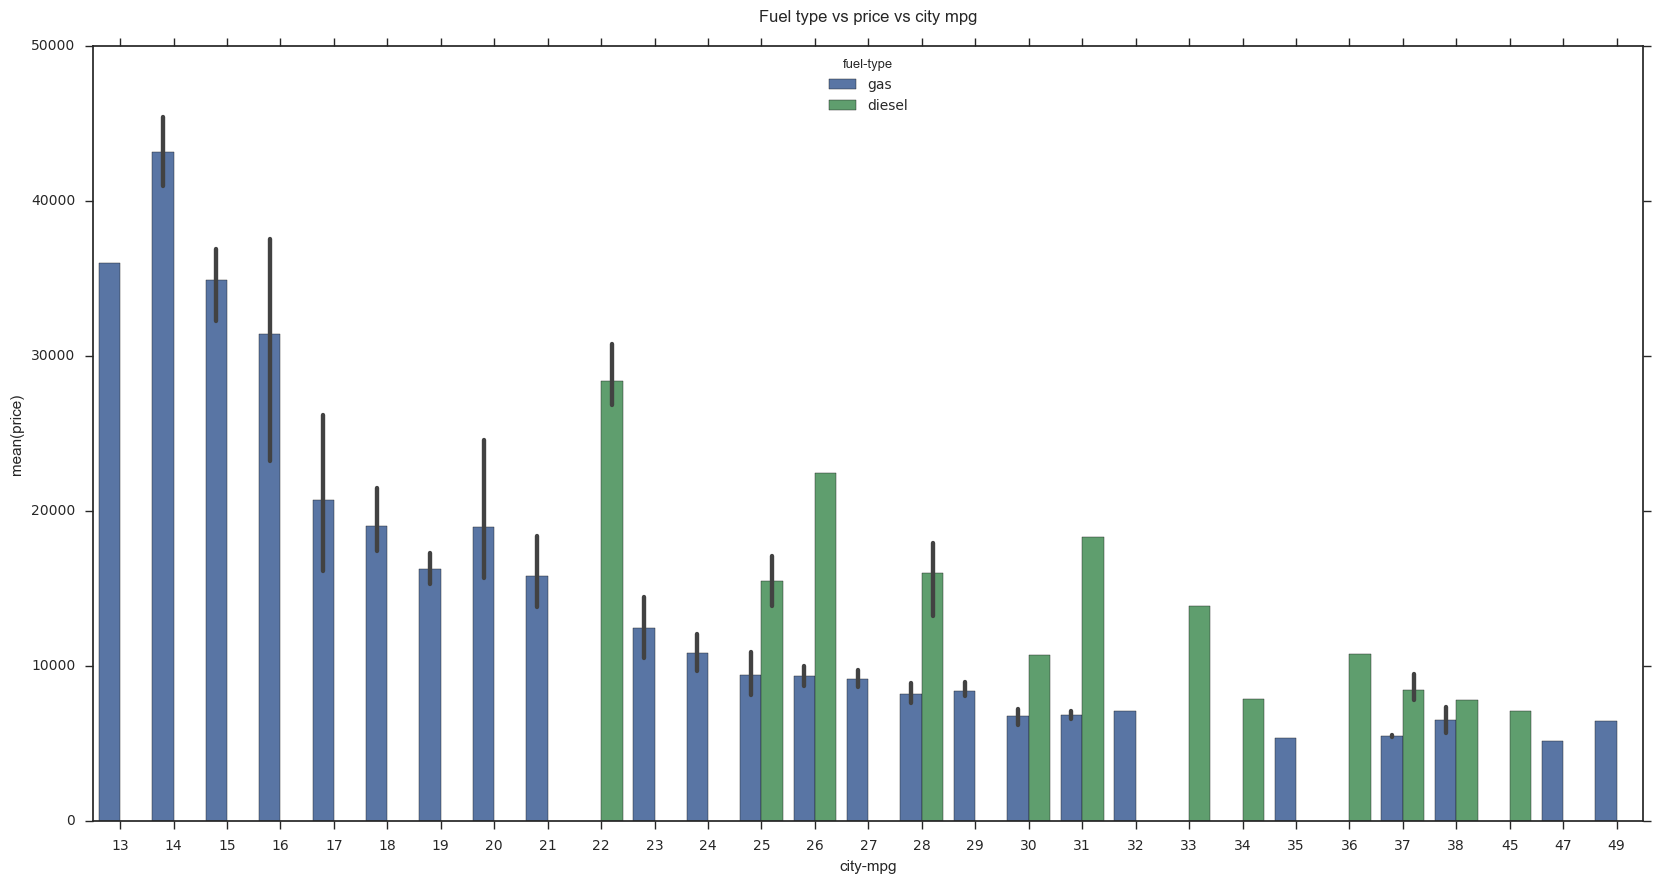

In [476]:
plt.figure(figsize=(20,10))
plt.title('Fuel type vs price vs city mpg\n')
sns.barplot(y="price", x="city-mpg", hue="fuel-type", data=auto);

- For highpriced vehicles, gas is preferred
- For different fuel type cars giving same mileage, diesel vehicles are more costlier than gas vehicles

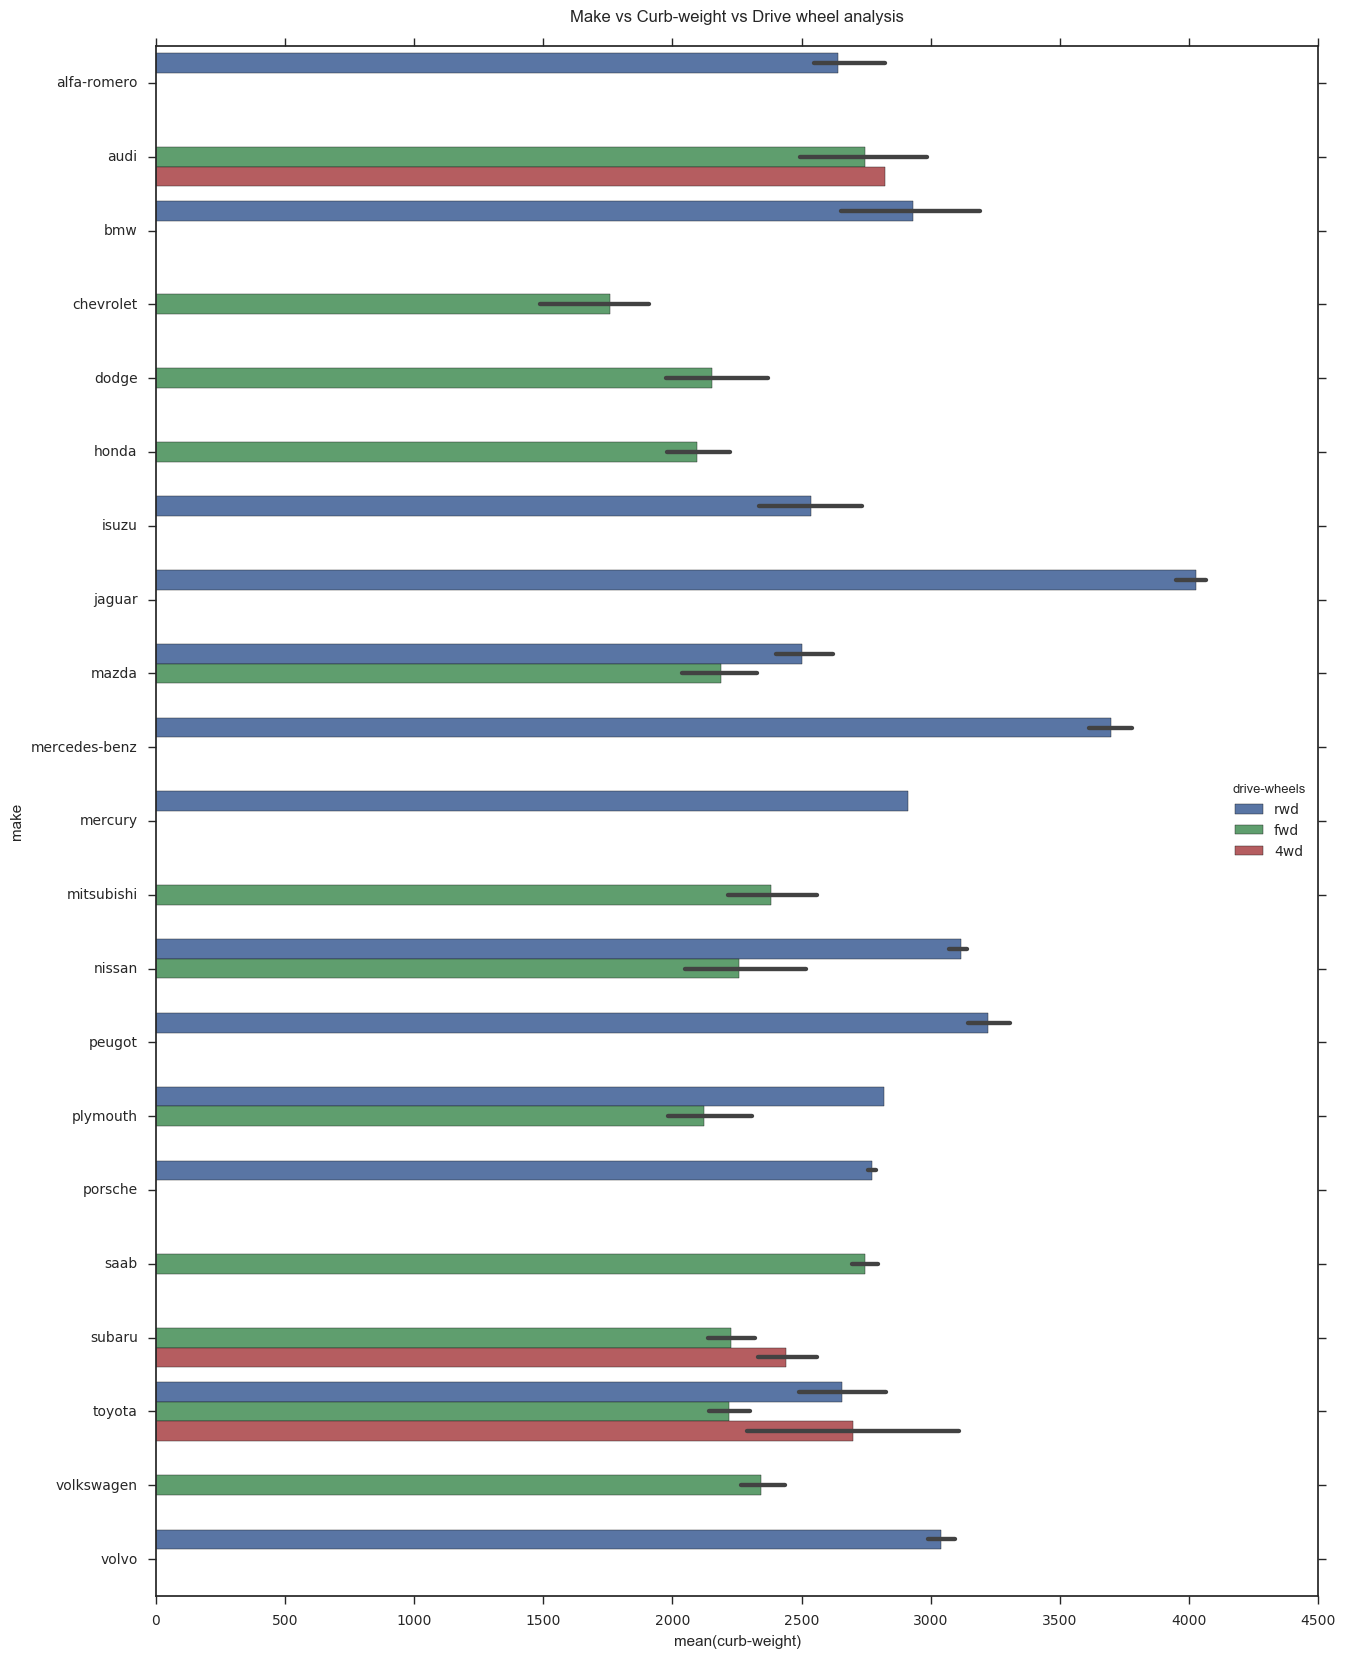

In [477]:
plt.figure(figsize=(15,20))
plt.title("Make vs Curb-weight vs Drive wheel analysis\n")
sns.barplot(y="make", x="curb-weight", hue="drive-wheels", data=auto)

- Front wheel drive(fwd) and rear wheel drive (rwd) are preferred compared to four wheel drive(4wd)
- The most preferred is rwd. The curb weight of rwd is highest amonst all. Rwd provide better balance and is preferred
- Mercedez Benz and jaguar have the highest curb weight. Chevrolet has the least.


In [478]:
#variable analysis to see its impact on "automobile pricing"
#we have already seen the distribution of prices above

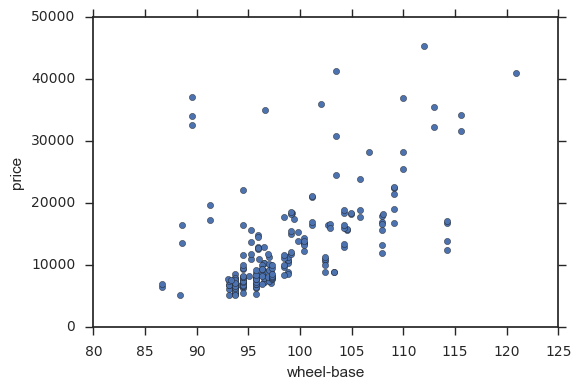

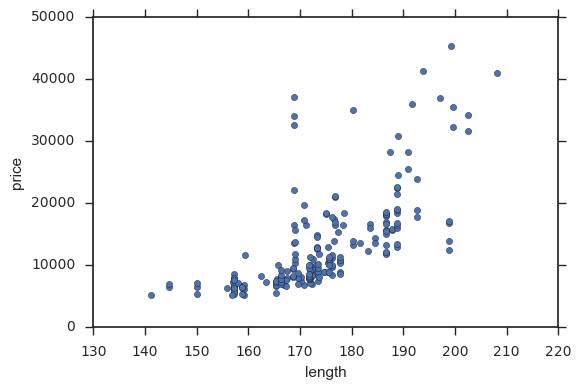

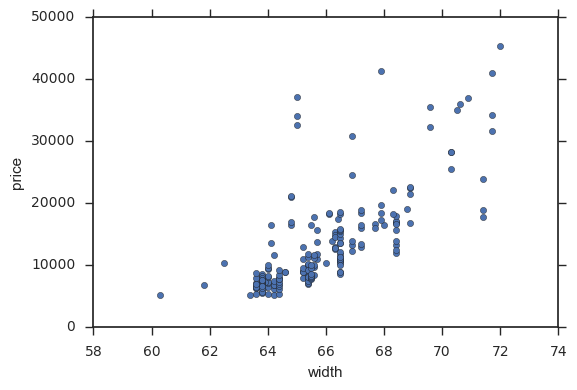

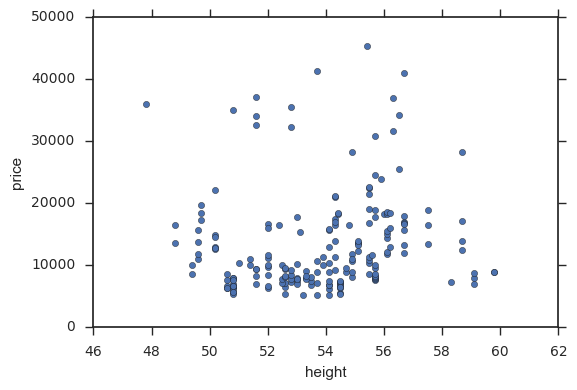

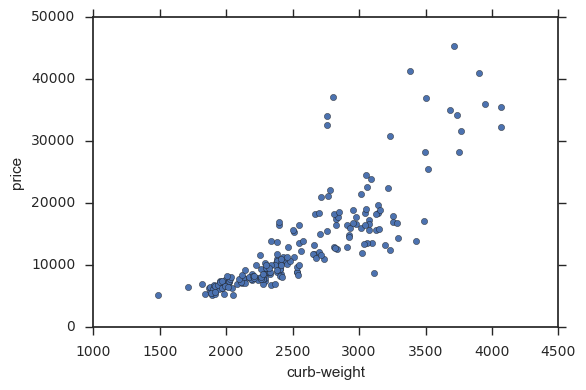

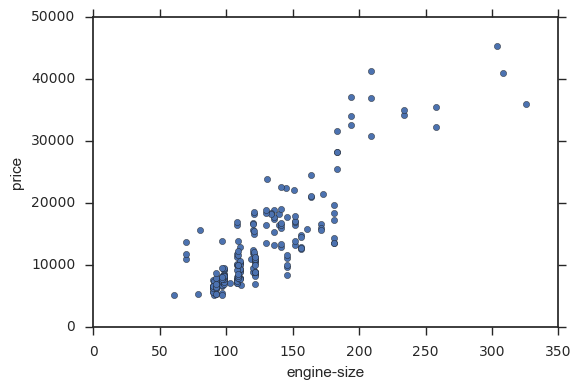

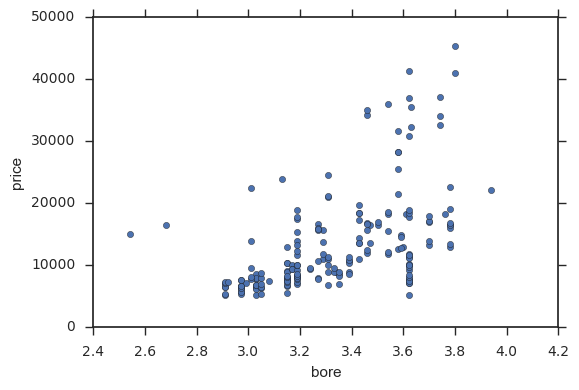

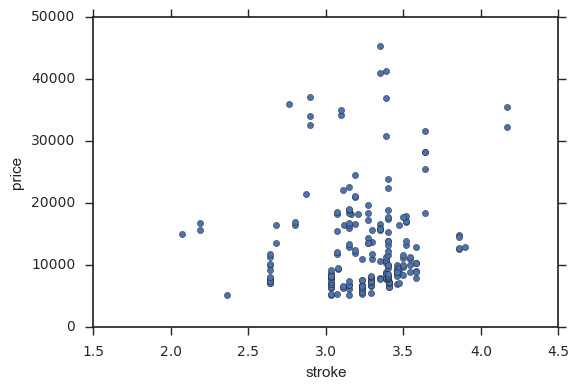

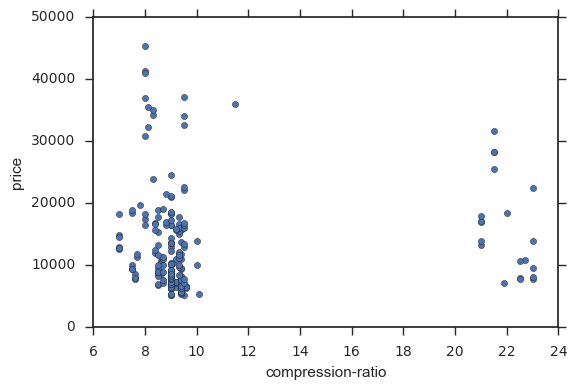

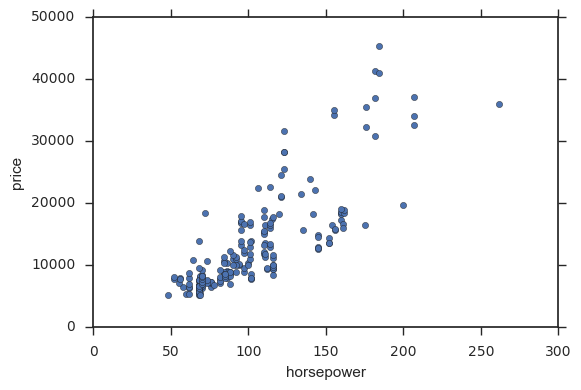

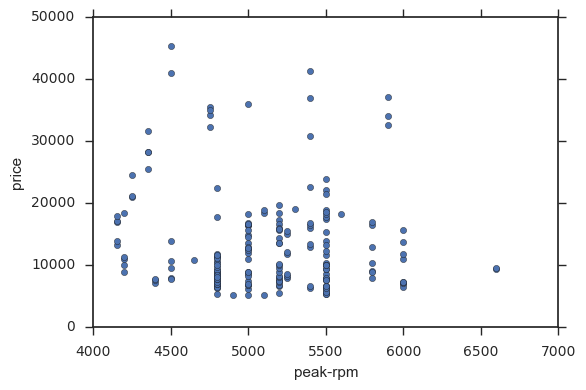

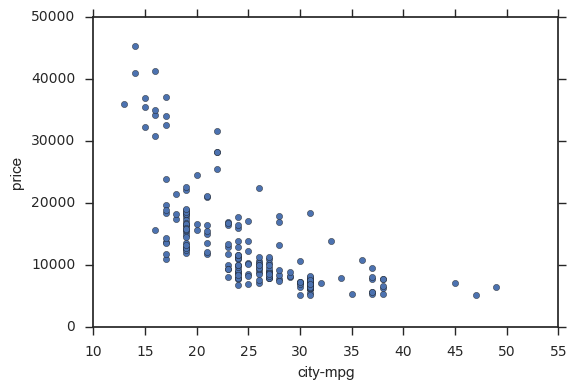

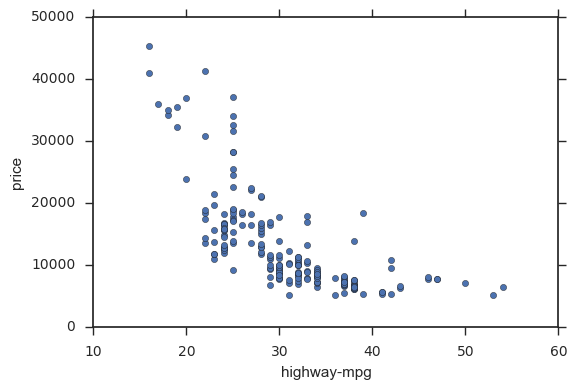

In [479]:

for yvar in (['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']):
    plt.scatter(auto[yvar],auto['price'])
    plt.xlabel(yvar)
    plt.ylabel('price')
    plt.show()

Positive relationship of price with:
- Wheel base (though there are some outliers that doesn’t fit nicely)
- Length
- Width
- Curb weight
- horsepower (though there are some outliers that doesn’t fit nicely)

Negative relationship of price with:
- mpg

No association of price with:
- Height
- engine size
- bore
- stroke
- compression-ratio
- peak-rpm

In [480]:
#variable analysis to see its impact on "mileage"

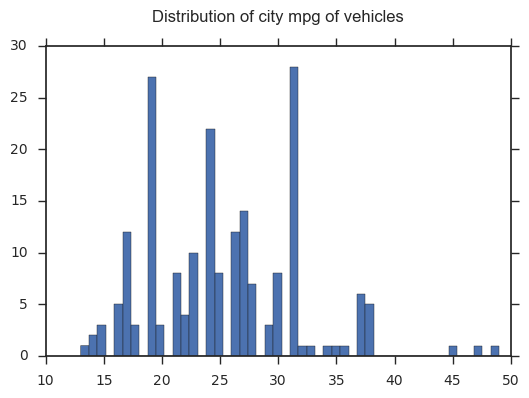

In [481]:
plt.hist(auto['city-mpg'],histtype='bar',bins=50)
plt.title('Distribution of city mpg of vehicles\n')

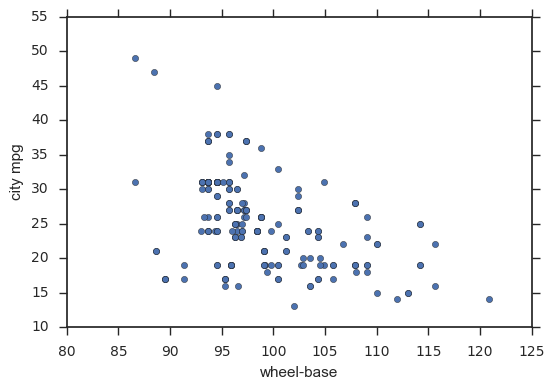

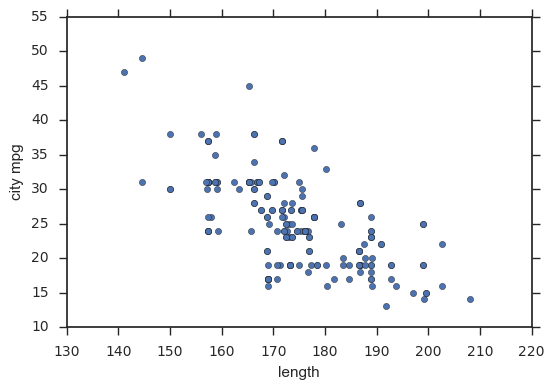

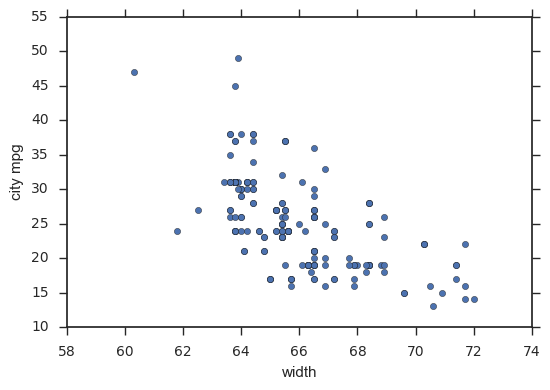

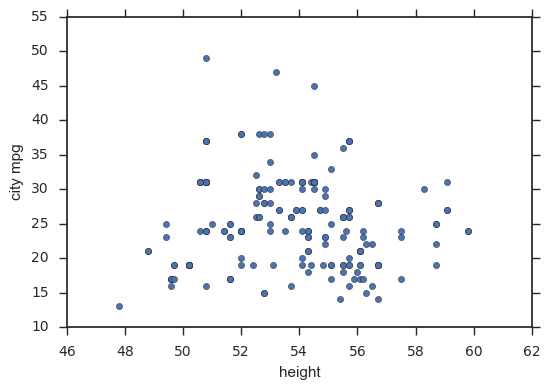

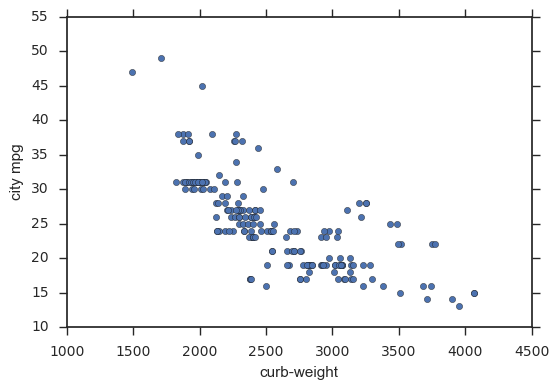

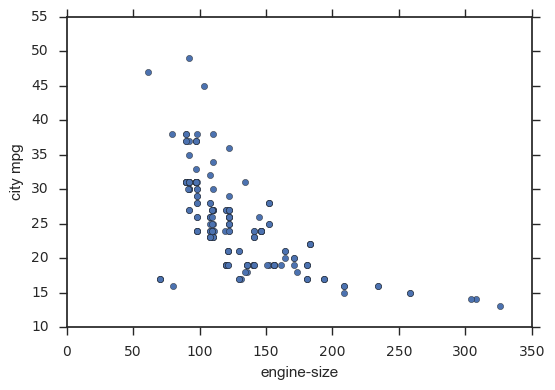

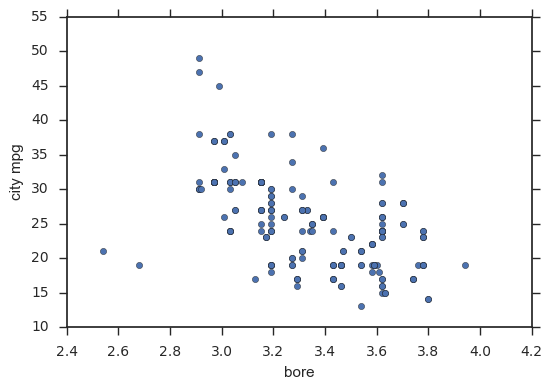

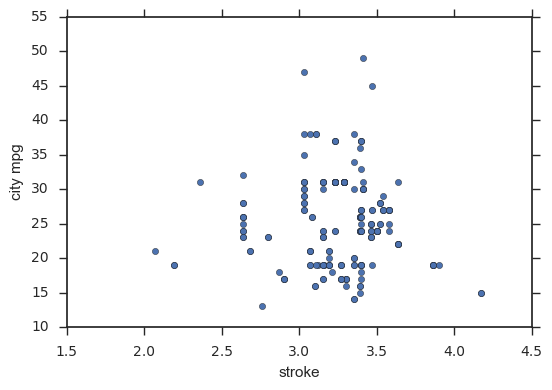

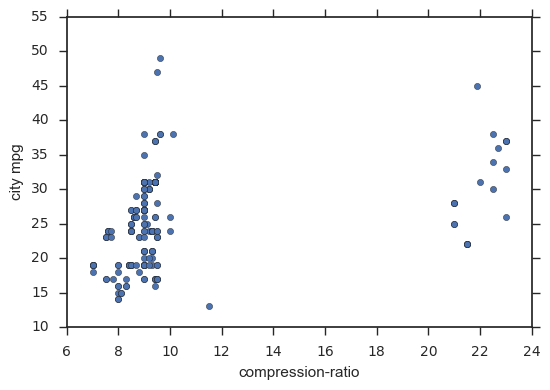

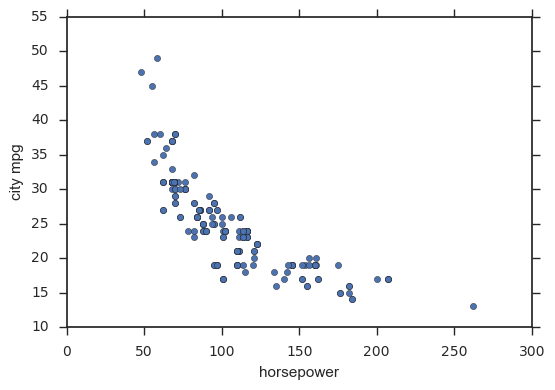

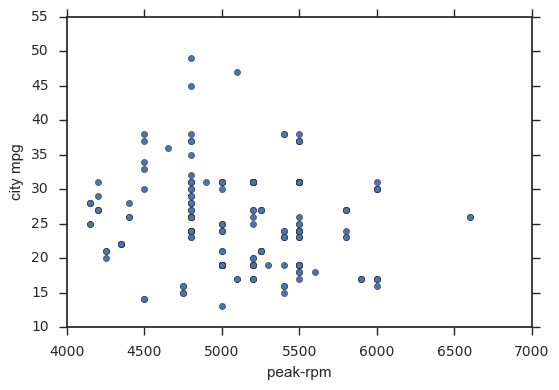

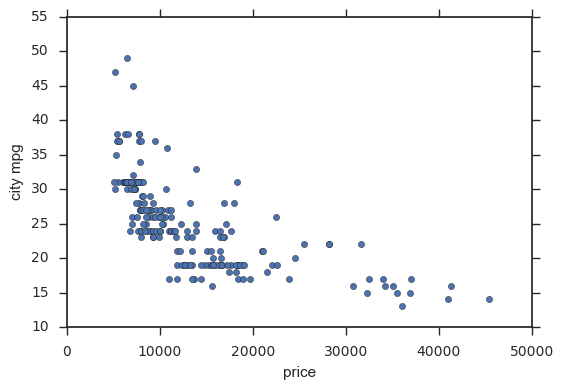

In [482]:
for yvar in (['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','price']):
    plt.scatter(auto[yvar],auto['city-mpg'])
    plt.xlabel(yvar)
    plt.ylabel('city mpg')
    plt.show()

Positive relationship of mpg with:
N/A

Negative relationship of mpg with:
- wheel base
- Length (though there are some outliers that doesn’t fit nicely)
- Width
- Curb weight
- Engine-size
- horsepower  
- price

No association of mpg with:
- Height
- bore
- stroke
- compression-ratio
- peak-rpm

# Conclusion
choosing best car in terms of price and mileage

In [483]:
aut1 = auto[['make','city-mpg','price']]

In [484]:
aut1 = aut1.pivot_table(index=['make'],aggfunc='mean').sort_values(['city-mpg','price'],ascending=False)
aut1=aut1.reset_index()
aut1

,make,city-mpg,price
0,chevrolet,41.000000,6007.000000
1,honda,30.384615,8184.692308
2,volkswagen,28.583333,10077.500000
3,plymouth,28.142857,7963.428571
4,dodge,28.000000,7875.444444
5,toyota,27.500000,9885.812500
6,nissan,27.000000,10415.666667
7,subaru,26.333333,8541.250000
8,mazda,25.705882,10652.882353
9,mitsubishi,24.923077,9239.769231


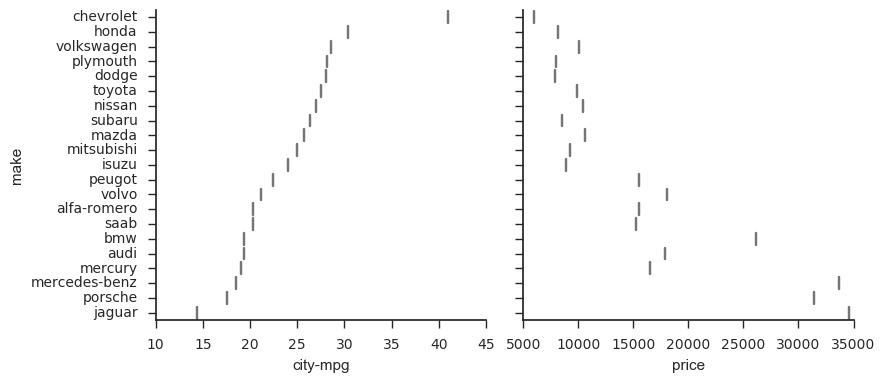

In [485]:
g = sns.PairGrid(aut1,
                 x_vars=["city-mpg", "price"],
                 y_vars=["make"],
                 size=4)
g.map(sns.violinplot, palette="pastel");

- Chevrolet is best car in terms of price and mileage
- Jaguar is on the other end of spectrum in terms of price and mileage